In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage


In [22]:
data = pd.read_csv(r"C:\Users\Admin\Downloads\crime_data.csv")

In [28]:
# Identify non-numeric values in the column 'Murder'
non_numeric_values = pd.to_numeric(data['Murder'], errors='coerce').isna()

# Replace non-numeric values with NaN or impute them
data.loc[non_numeric_values, 'Murder'] = np.nan

# Convert the column to numeric
data['Murder'] = pd.to_numeric(data['Murder'])


In [35]:
numeric_data = data.select_dtypes(include=[np.number])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)


In [36]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Index starts from 2
print("Optimal number of clusters (K-means):", optimal_k)


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

Optimal number of clusters (K-means): 2


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


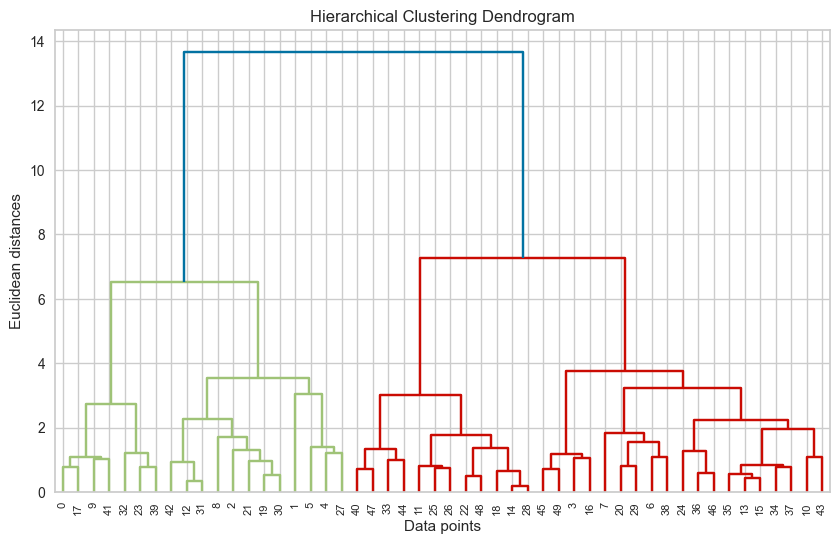

In [37]:
plt.figure(figsize=(10, 6))
dendrogram(linkage(scaled_data, method='ward'))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Euclidean distances')
plt.show()

In [38]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_clusters = kmeans.fit_predict(scaled_data)

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [39]:
data['KMeans_Cluster'] = kmeans_clusters

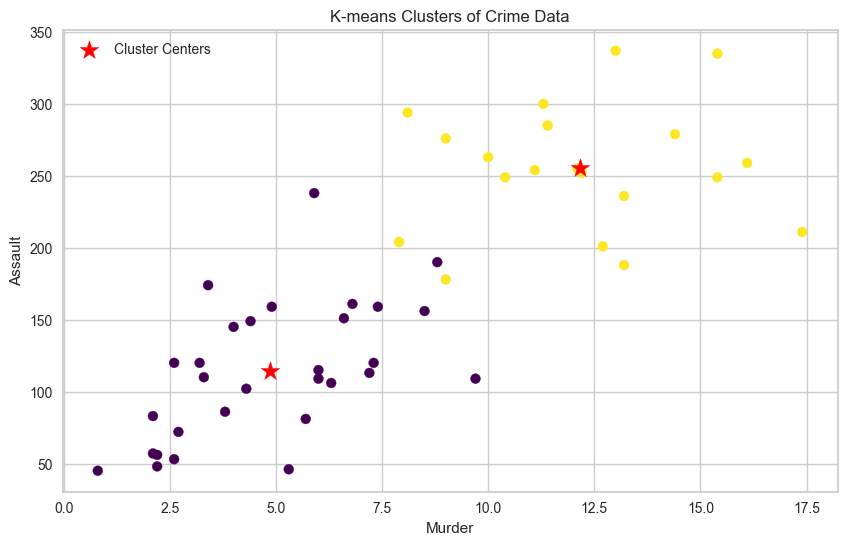

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Murder'], data['Assault'], c=data['KMeans_Cluster'], cmap='viridis', s=50)
plt.scatter(kmeans_cluster_centers[:, 0], kmeans_cluster_centers[:, 1], c='red', marker='*', s=200, label='Cluster Centers')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.title('K-means Clusters of Crime Data')
plt.legend()
plt.show()